# Boston House Price Predictions


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


E:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("HousingData.csv")


In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df["CRIM"].fillna(df["CRIM"].mode()[0], inplace=True)
df["ZN"].fillna(df["ZN"].mode()[0], inplace=True)
df["INDUS"].fillna(df["INDUS"].mode()[0], inplace=True)
df["CHAS"].fillna(df["CHAS"].mode()[0], inplace=True)
df["AGE"].fillna(df["AGE"].mode()[0], inplace=True)
df["LSTAT"].fillna(df["LSTAT"].mode()[0], inplace=True)

In [10]:
df.isna().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

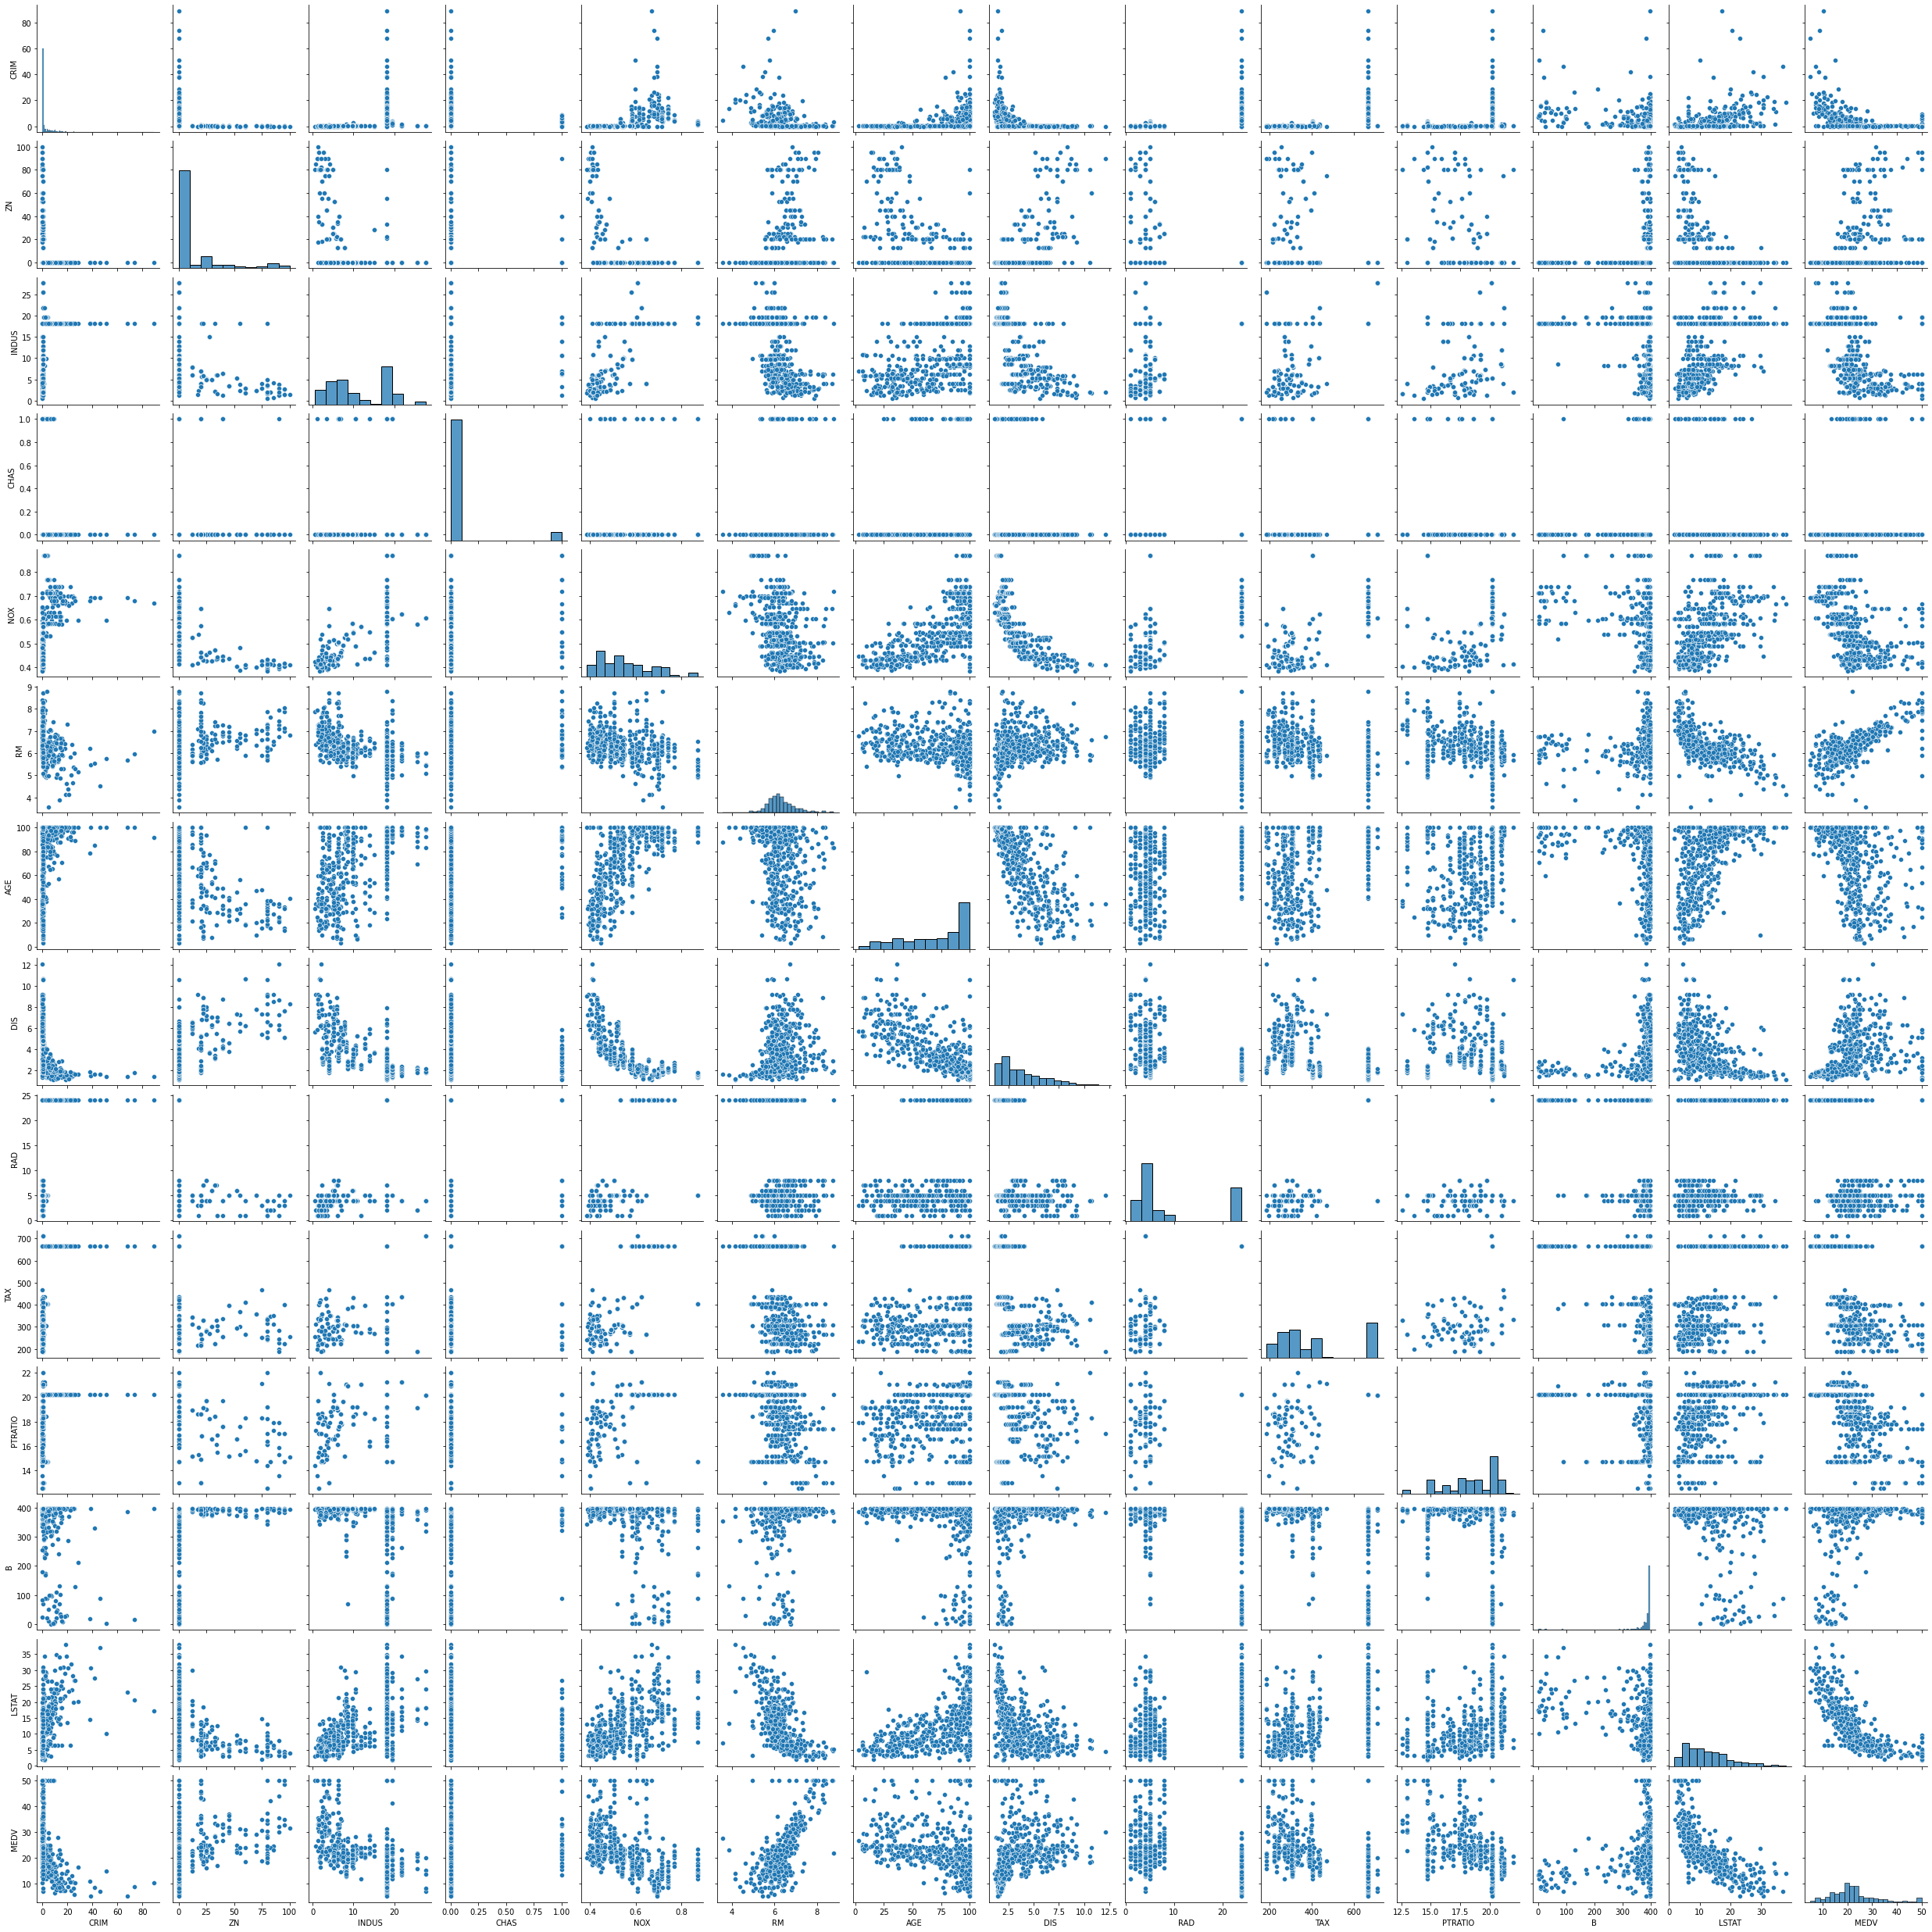

In [11]:
sns.pairplot(df)



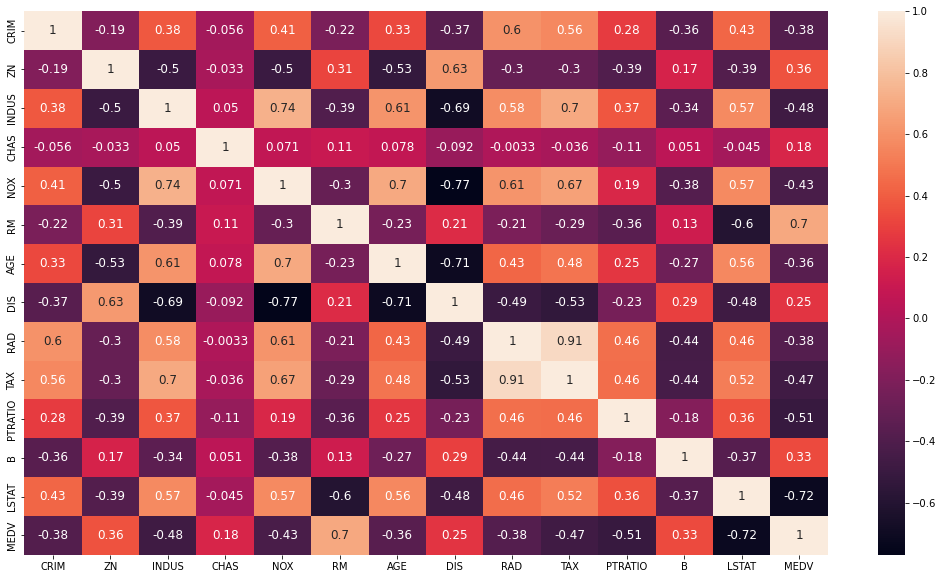

In [15]:
corrmat=df.corr()
corrmat
plt.subplots(figsize=(18, 10))
sns.heatmap(corrmat, annot=True, annot_kws={'size': 12})
plt.show()


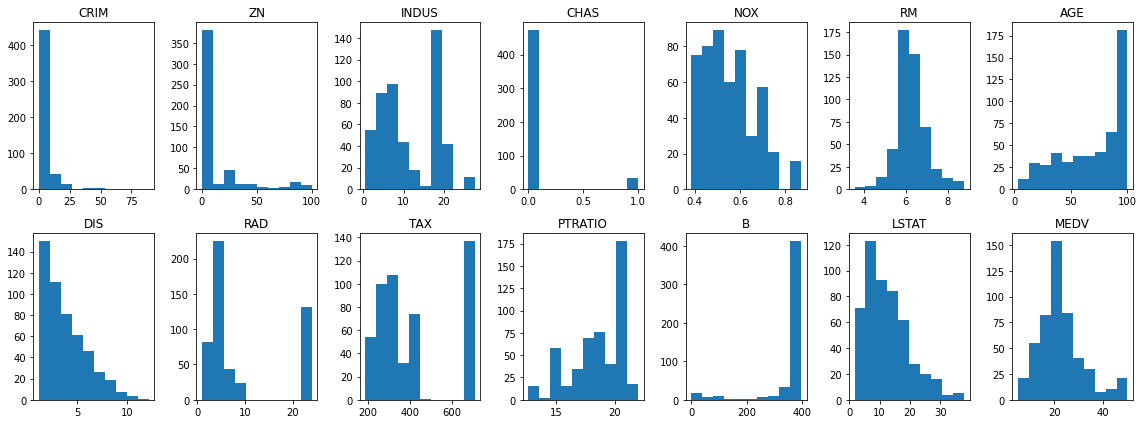

In [13]:
import matplotlib.pyplot as plt

rows = 2
cols = 7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 6))
col = df.columns
index = 0

for i in range(rows):
    for j in range(cols):
        ax[i, j].hist(df[col[index]])
        ax[i, j].set_title(col[index])
        index += 1

plt.tight_layout()
plt.show()


In [16]:
x=df.drop(['MEDV'],axis=1)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,6.36


In [18]:
y=df['MEDV']
y.head()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_predict=model.predict(x_test)

y_predict,y_test
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_predict)

0.5774748192443915

In [20]:
mean_squared_error(y_test,y_predict)


34.40556593327604

In [21]:
np.sqrt(mean_squared_error(y_test,y_predict))


5.865625792127899

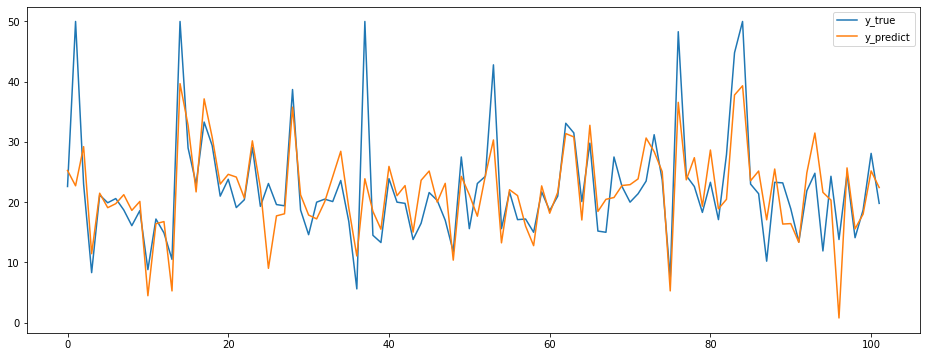

In [22]:
plt.subplots(figsize=(16, 6))

x_points = list(range(len(y_test)))
plt.plot(x_points, y_test, label='y_true')
plt.plot(x_points, y_predict, label='y_predict')

plt.legend()
plt.show()


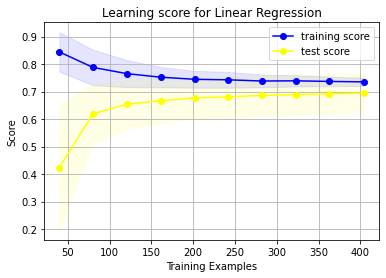

In [26]:
from sklearn.model_selection import learning_curve, ShuffleSplit


def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        train_size=np.linspace(0.1, 1, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, train_sizes=train_size)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='yellow')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='yellow', label='test score')
    plt.legend(loc='best')
    return plt

title = 'Learning score for Linear Regression'
cv = ShuffleSplit(n_splits=100, random_state=0, test_size=0.2)
model = LinearRegression()
plot_learning_curve(model, title, x, y, ylim=(0.7, 1.01), cv=cv)
plt.show()